In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from keras.datasets import mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

2024-04-26 05:24:03.410552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 05:24:03.410704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 05:24:03.634432: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
trainImages.shape

(60000, 28, 28)

In [3]:
print(len(testLabels))
print(testLabels)

10000
[7 2 1 ... 4 5 6]


In [5]:
from keras import models
from keras import layers


# Modify the shape of the images
trainImages = trainImages.reshape((60000, 28 * 28))
testImages = testImages.reshape((10000, 28 * 28))

# scale the values in the range [0, 1]
trainImages = trainImages.astype('float32')/255
testImages = testImages.astype('float32')/255

numClasses = 10
# Use one-hot encoding to chage the train and test labels into categorical
from keras.utils import to_categorical
trainLabels = to_categorical(trainLabels, numClasses)
testLabels = to_categorical(testLabels, numClasses)


network = models.Sequential() # Create sequential networks
# Create two dense layers, one with relu activation and other with softmax activation
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

# Specify the optimizer and the loss function, also specify the metric for evaluation
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Run the network that is built
network.fit(trainImages, trainLabels, epochs = 5, batch_size = 128)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8712 - loss: 0.4378
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9675 - loss: 0.1143
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9784 - loss: 0.0745
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9846 - loss: 0.0505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9892 - loss: 0.0376


In [6]:
testLoss , testAcc = network.evaluate(testImages, testLabels)
print(testAcc, testLoss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0783
0.9807000160217285 0.06325962394475937


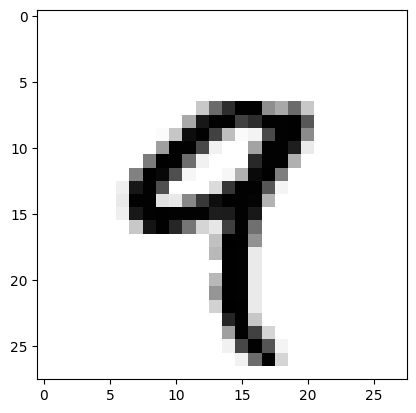

In [7]:
import matplotlib.pyplot as plt
plt.imshow(trainImages[4], cmap = plt.cm.binary)
plt.show()

**Broadcasting**

The smaller tensor  will be broadcasted to match the shape of the larger tensor

Two tensor element-wise operations are allowed if one tensor has shape *(a, b, ..., n, n+1, ..., m)* and other has the shape *(n, n+1, ..., m)*. The broadcasting will then automatically happen for axes *a* through *n-1*

In [6]:
# Example
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
y = [0]*32
x = []
for i in y:
    x.append([i]*10)
x = np.array(x)
print(x.shape)
y = np.arange(0,10)
print(y.shape)
z = x + y
print(z)

(32, 10)
(10,)
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


# Classifying the movie reviews

In [27]:

from keras.datasets import imdb
(trainData, trainLabels), (testData, testLabels) = imdb.load_data(num_words=10000)
# the data cannot have a value greater than 10000

In [28]:
print(len(trainData), len(trainData[3]), len(testData), len(testLabels))

25000 550 25000 25000


In [29]:
import numpy as np
def vectorizeData(data, dimensions = 10000):    
    resultData = np.zeros((len(data), dimensions))
    for i, dataPoint in enumerate(data):
        resultData[i, dataPoint] = 1.
    return resultData
xTrain = vectorizeData(trainData)
xTest = vectorizeData(testData)

In [30]:
yTrain = np.asarray(trainLabels).astype('float32')
yTest = np.asarray(testLabels).astype('float32')

In [31]:
trainLabels

array([1, 0, 0, ..., 0, 1, 0])

In [32]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
result = model.fit(xTrain, yTrain, epochs = 20, batch_size = 512)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7287 - loss: 0.5603
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9022 - loss: 0.2846
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9238 - loss: 0.2135
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9393 - loss: 0.1787
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9497 - loss: 0.1503
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9531 - loss: 0.1348
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9591 - loss: 0.1195
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9633 - loss: 0.1106
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9708 - loss: 0.0959
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9718 - loss: 0.0884
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9753 - loss: 0.0797
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy:

In [25]:
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
result = model.fit(xTrain, yTrain, epochs = 20, batch_size = 512)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7228 - loss: 0.5829
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8943 - loss: 0.2616
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9165 - loss: 0.2025
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9353 - loss: 0.1546
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9491 - loss: 0.1214
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9582 - loss: 0.1019
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9675 - loss: 0.0823
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9692 - loss: 0.0772
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9824 - loss: 0.0482
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9756 - loss: 0.0660
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9866 - loss: 0.0368
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy:

In [34]:
from keras import optimizers
from keras import metrics
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.01), loss = 'binary_crossentropy', metrics = [metrics.binary_accuracy])
result = model.fit(xTrain, yTrain, epochs = 20, batch_size = 512)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.6659 - loss: 0.5949
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.8919 - loss: 0.2614
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - binary_accuracy: 0.9214 - loss: 0.1964
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.9424 - loss: 0.1498
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.9414 - loss: 0.1400
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.9575 - loss: 0.1062
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.9678 - loss: 0.0873
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.9738 - loss: 0.0659
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.9796 - loss: 0.0513
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.9823 - loss: 0.0528
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.9840 -

In [35]:
result.history

{'binary_accuracy': [0.7665600180625916,
  0.8973600268363953,
  0.9189199805259705,
  0.9376400113105774,
  0.9442399740219116,
  0.9553599953651428,
  0.9654800295829773,
  0.9725199937820435,
  0.9777600169181824,
  0.9805200099945068,
  0.9856399893760681,
  0.9861199855804443,
  0.986240029335022,
  0.9851199984550476,
  0.9889600276947021,
  0.9877600073814392,
  0.9880800247192383,
  0.9884399771690369,
  0.9890400171279907,
  0.9941999912261963],
 'loss': [0.4705924093723297,
  0.2527053654193878,
  0.2000633031129837,
  0.15806661546230316,
  0.13336826860904694,
  0.11146955192089081,
  0.09146387875080109,
  0.07135356217622757,
  0.058066461235284805,
  0.05901232734322548,
  0.04370087757706642,
  0.0401453971862793,
  0.04218486696481705,
  0.04526239633560181,
  0.028402114287018776,
  0.03193988651037216,
  0.04207432270050049,
  0.03708932176232338,
  0.030922526493668556,
  0.0089119803160429]}

In [51]:
# Using Validation Data
xValid = xTrain[:10000]
yValid = yTrain[:10000]
xTrainNew = xTrain[10000:]
yTrainNew = yTrain[10000:]
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape=(10000,)))
model.add(layers.Dense(16,activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
result = model.fit(xTrainNew, yTrainNew, epochs = 10, batch_size = 512, validation_data = (xValid, yValid))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6933 - loss: 0.2017 - val_accuracy: 0.8677 - val_loss: 0.1139
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8880 - loss: 0.0968 - val_accuracy: 0.8627 - val_loss: 0.1034
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9199 - loss: 0.0683 - val_accuracy: 0.8887 - val_loss: 0.0830
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9415 - loss: 0.0508 - val_accuracy: 0.8828 - val_loss: 0.0852
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9492 - loss: 0.0429 - val_accuracy: 0.8761 - val_loss: 0.0891
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9628 - loss: 0.0329 - val_accuracy: 0.8622 - val_loss: 0.1022
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9584 - loss: 0.0339 - val_accuracy: 0.8798 - val_loss: 0.0917
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9710 - loss: 0.0261 - val_accuracy: 0.8766 - v

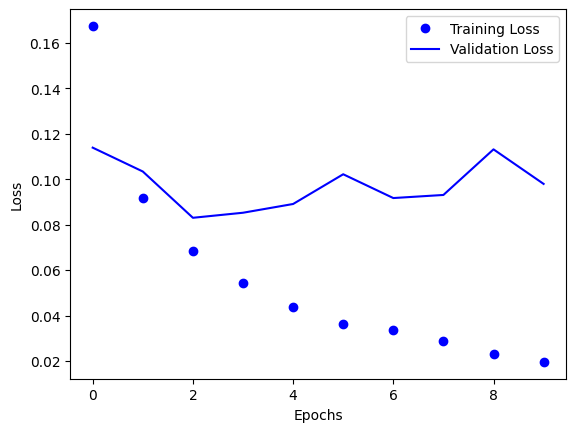

In [52]:
import matplotlib.pyplot as plt
lossData = result.history['loss']
lossVal = result.history['val_loss']
accData = result.history['accuracy']
accVal = result.history['val_accuracy']
epochs = range(0, len(result.history['accuracy']))
plt.plot(epochs, lossData, 'bo', label = 'Training Loss')
plt.plot(epochs, lossVal, 'b', label = 'Validation Loss')
# plt.plot(epochs, accData, 'ro', label = 'Train Accuracy')
# plt.plot(epochs, accVal, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


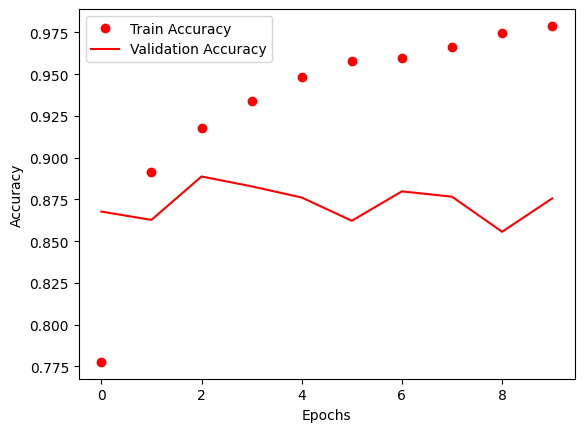

In [53]:
accData = result.history['accuracy']
accVal = result.history['val_accuracy']
epochs = range(0, len(result.history['accuracy']))
plt.plot(epochs, accData, 'ro', label = 'Train Accuracy')
plt.plot(epochs, accVal, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
model.predict(xTest)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.03485263],
       [0.9996557 ],
       [0.96982217],
       ...,
       [0.01673376],
       [0.03435118],
       [0.56935054]], dtype=float32)

# Classifying NewsWires

In [1]:
from keras.datasets import reuters

In [6]:
(trainData, trainLabels), (testData, testLabels) = reuters.load_data(num_words = 10000)

In [7]:
print(len(trainData), len(testData))

8982 2246


In [22]:
import numpy as np
def vectorizeData(data, dimensions = 10000):
    resultData = np.zeros((len(data), dimensions))
    for i, dataPoint in enumerate(data):
        resultData[i, dataPoint] = 1
    return resultData

xTrain = vectorizeData(trainData)
xTest = vectorizeData(testData)
from collections import Counter
max(Counter(trainLabels))

45

In [28]:
testLabels

array([ 3, 10,  1, ...,  3,  3, 24])

In [30]:
def toOneHotEncoding(labels, dimensions = 46):
    resultData = np.zeros((len(labels), dimensions))
    for i, dataPoint in enumerate(labels):
        resultData[i, dataPoint] = 1
    return resultData

oneHotYTrain = toOneHotEncoding(trainLabels)
oneHotYTest = toOneHotEncoding(testLabels)

In [31]:
oneHotYTrain[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])